<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/03_Abalone_Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
filename = '/content/drive/MyDrive/Data/abalone.data'

In [21]:
# Load data
abalone = pd.read_csv(filename, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
abalone.rename(columns={0 : 'Sex', 1 : 'Length', 2 : 'Diameter', 3 : 'Height', 4 : 'Whole weight', 5 : 'Shucked weight', 6 : 'Viscera weight', 7 : 'Shell weight', 8 : 'Rings'}, inplace=True)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [24]:
# View unique categories
abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

1) Transform the categorical variable (sex) by dummy encoding it.

In [25]:
# Pandas get_dummies
ohe_abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first=True)
ohe_abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


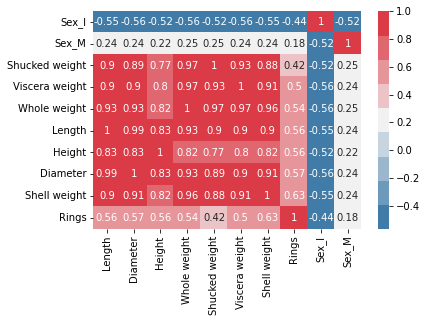

In [26]:
# Checking correlation
sns.heatmap(ohe_abalone.corr().sort_values(by = ['Rings']), cmap = sns.diverging_palette(240, 10, n=9), annot = True);


plt.show()

2) Separate your data into the features matrix (X) and target vector (y).

In [36]:
y = ohe_abalone['Rings']
X =ohe_abalone.drop(columns = 'Rings')

In [28]:
y.shape

(4177,)

In [29]:
X.shape

(4177, 9)

3) Create a train, test, split on the data. Please use random number 42 for consistency.

In [30]:
# split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

4) Instantiate and fit the model.

In [31]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5) Use the model to make predictions on the test set.

In [32]:
preds = reg_model.predict(X_test)
preds

array([11.79856603, 10.25371718, 14.08329292, ..., 12.28399232,
       10.92145395,  9.50421419])

6) Find the R^2 value of your model.

In [33]:
train_score = reg_model.score(X_train, y_train)
print(train_score)

0.5344827192989167


In [34]:
test_score = reg_model.score(X_test, y_test)
print(test_score)

0.5454718270324019



Per R^2 above, about half of the variation in 'Rings' can be explained by the features.  Train and test scores are similar which means this model makes good predictions on the test data.  

In [35]:
# Determining age of abalone 
age = abalone['Rings'] + 1.5
age

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Rings, Length: 4177, dtype: float64